In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.DataFrame({
    "Study_Hours":[1,2,3,4,5],
    "Marks":[2,4,5,4,5]
})    

In [3]:
df

,Study_Hours,Marks
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [4]:
X=df[["Study_Hours"]]
y=df["Marks"]

In [5]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [6]:
X_line = pd.DataFrame(
    {'Study_Hours': np.linspace(X.min()[0], X.max()[0], 100)}
)
y_line = model.predict(X_line)

C:\Users\PRASANNA\AppData\Local\Temp\ipykernel_10112\3480316716.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  {'Study_Hours': np.linspace(X.min()[0], X.max()[0], 100)}


In [7]:
X_line

,Study_Hours
0,1.000000
1,1.040404
2,1.080808
3,1.121212
4,1.161616
...,...
95,4.838384
96,4.878788
97,4.919192
98,4.959596


In [8]:
print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

Slope (m): 0.6
Intercept (b): 2.2


In [9]:
X_new = pd.DataFrame({'Study_Hours': [4.0]})
y_new = model.predict(X_new)

In [10]:
print("Predict Value: ",y_new)

Predict Value:  [4.6]


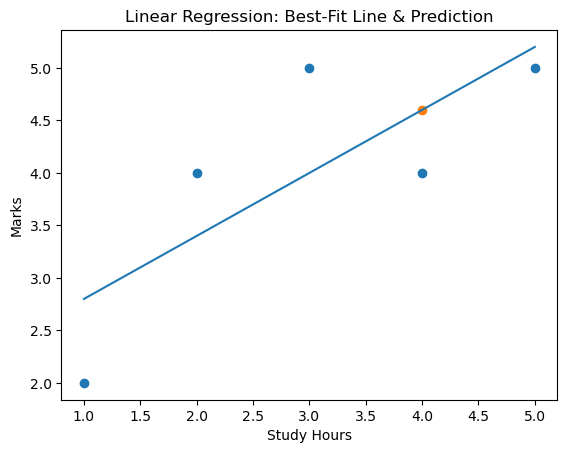

In [23]:
# Plot
plt.figure()
plt.scatter(X,y)
plt.plot(X_line, y_line)
plt.scatter(X_new, y_new)
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Linear Regression: Best-Fit Line & Prediction")
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)

print("MSE:", mse)

MSE: 0.47999999999999987


# Multi Linear Regression

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
df=pd.read_csv(r"C:\Users\PRASANNA\Downloads\MLR_Study_marks.csv")

In [28]:
df

,Study_Hours,Attendance,Sleep_Hours,Marks
0,2,60,5,48
1,3,62,5,50
2,4,65,6,55
3,5,68,6,58
4,6,70,6,60
...,...,...,...,...
72,6,79,6,68
73,7,82,7,71
74,8,85,7,75
75,9,88,7,78


In [29]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Study_Hours  77 non-null     int64
 1   Attendance   77 non-null     int64
 2   Sleep_Hours  77 non-null     int64
 3   Marks        77 non-null     int64
dtypes: int64(4)
memory usage: 2.5 KB
None


In [40]:
# Step3: Train-Test_Split
X = df[["Study_Hours", "Attendance", "Sleep_Hours"]]
y = df["Marks"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Step 4: Train Model
# ----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("slope:", model.coef_)

Intercept: -0.2878491041180524
slope: [0.95830116 0.7505221  0.40445082]


In [44]:
# Step 5: Predictions
# ---------------------------
y_pred =model.predict(X_test)

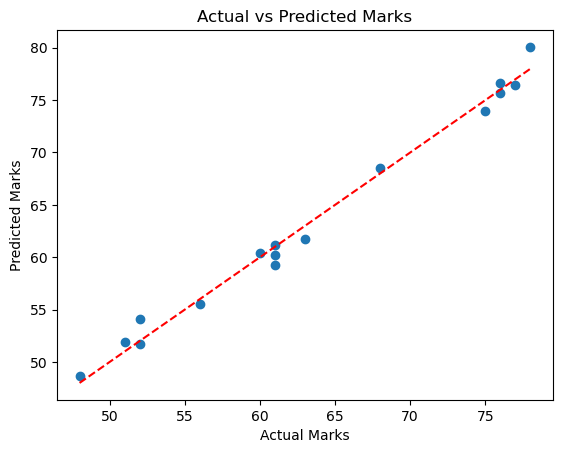

In [47]:
# Step 6: Residual Plot)
# --------------------------
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [48]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)


Mean Squared Error: 1.1326076728731713


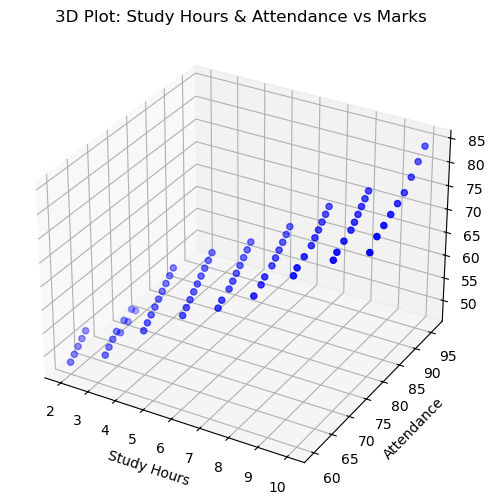

In [50]:
# Step 7: 3D Plot (Study_Hours, Attendance vs Marks)
# --------------------------------------
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Study_Hours"], df["Attendance"], df["Marks"], c='b', marker='o')
ax.set_xlabel("Study Hours")
ax.set_ylabel("Attendance")
ax.set_zlabel("Marks")
ax.set_title("3D Plot: Study Hours & Attendance vs Marks")
plt.show()